# Basic Thicket Tutorial: Thicket 101

Thicket is a python-based toolkit for Exploratory Data Analysis (EDA) of parallel performance data that enables performance optimization and understanding of applications’ performance on supercomputers. It bridges the performance tool gap between being able to consider only a single instance of a simulation run (e.g., single platform, single measurement tool, or single scale) and finding actionable insights in multi-dimensional, multi-scale, multi-architecture, and multi-tool performance datasets.

## 1. Import Necessary Packages

To explore the structure and various capabilities of thicket components, we begin by importing necessary packages. These include python extensions and thicket's statistical functions.

In [1]:
from glob import glob
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
from IPython.display import HTML
import hatchet as ht

import thicket as tt

display(HTML("<style>.container { width:80% !important; }</style>"))

<IPython.core.display.Javascript object>

In [2]:
# Disable the Pandas 3 Future Warnings for now
import warnings
warnings.filterwarnings("ignore", category=FutureWarning) 

## 2. Read in Performance Profiles

For this notebook, we select profiles generated on Lawrence Livermore National Lab (LLNL) machine, lassen. We create two thicket objects, one generated with the same block size of 128 and the other generated with different block sizes (128 and 256).   

In [3]:
problem_sizes = [
    "1048576", 
    "2097152", 
    "4194304", 
    "8388608"
]
lassen1 = [f"../data/lassen/clang10.0.1_nvcc10.2.89_{x}/1/Base_CUDA-block_128.cali" for x in problem_sizes]
lassen2 = [f"../data/lassen/clang10.0.1_nvcc10.2.89_1048576/1/Base_CUDA-block_256.cali"]

# generate thicket(s)
th_lassen = tt.Thicket.from_caliperreader(lassen1, disable_tqdm=True)
th_obj = tt.Thicket.from_caliperreader(lassen1 + lassen2, disable_tqdm=True)

## 3. More Information on a Function

You can use the `help()` method within Python to see the information for a given object. You can do this by typing `help(object)`. 
This will allow you to see the arguments for the function, and what will be returned. An example is below.

In [4]:
help(tt.Thicket.from_caliperreader)

Help on function from_caliperreader in module thicket.thicket:

from_caliperreader(filename_or_caliperreader, intersection=False, disable_tqdm=False)
    Helper function to read one caliper file.
    
    Arguments:
        filename_or_caliperreader (str or CaliperReader): name of a Caliper output
            file in `.cali` format, or a CaliperReader object
        intersection (bool): whether to perform intersection or union (default)
        disable_tqdm (bool): whether to display tqdm progress bar



## 4. Thicket Components

### 4.1 Performance Data

The performance data table is a multi-dimensional, multi-indexed component of thicket. The rows represent nodes that each contain a different execution (i.e., profile index) of the associated call tree node. 


#### View performance data table

In [5]:
display(HTML(th_lassen.dataframe.to_html()))

#### Visualize performance metrics on the tree

With the `Thicket.tree()` function, we can visualize different metrics in the performance data table on nodes in the call tree for a single profile. By default, the first profile in the table will be selected.

In [6]:
print(th_lassen.tree(metric_column="Avg time/rank"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.781 RAJAPerf
├─ 0.007 Algorithm
│  ├─ 0.002 Algorithm_MEMCPY
│  ├─ 0.002 Algorithm_MEMSET
│  └─ 0.003 Algorithm_REDUCE_SUM
├─ 0.185 Apps
│  ├─ 0.007 Apps_DEL_DOT_VEC_2D
│  ├─ 0.039 Apps_ENERGY
│  ├─ 0.004 Apps_FIR
│  ├─ 0.035 Apps_HALOEXCHANGE
│  ├─ 0.005 Apps_HALOEXCHANGE_FUSED
│  ├─ 0.014 Apps_LTIMES
│  ├─ 0.014 Apps_LTIMES_NOVIEW
│  ├─ 0.008 Apps_NODAL_ACCUMULATION_3D
│  ├─ 0.048 Apps_PRESSURE
│  ├─ 0.006 Apps_VOL3D
│  └─ 0.004 Apps_ZONAL_ACCUMULATION_3D
├─ 0.358 Basic
│  ├─ 0.009 Basic_COPY8
│  ├─ 0.017 Basic_DAXPY
│  ├─ 0.017 Basic_DAXPY_ATOMIC
│  ├─ 0.012 Basic_IF_QUAD
│  ├─ 0.028 Basic_INIT3
│  ├─ 0.042 Basic_INIT_VIEW1D
│  ├─ 0.042 Basic_INIT_VIEW1D_OFFSET
│  ├─ 0.020 Basic_MULADDSUB
│  ├─ 0.021 Basic_NESTED_INIT
│  ├─ 0.127 Basic_PI_ATOMIC
│  ├─ 0.003 Basic_PI_REDUCE
│  ├─ 0.002 Basic_REDUCE

Visualize a specific profile using the `indices` parameter to select its index from the performance data table.

In [7]:
print(th_lassen.tree(metric_column="Avg time/rank", indices=(2458031255)))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

6.766 RAJAPerf
├─ 0.020 Algorithm
│  ├─ 0.009 Algorithm_MEMCPY
│  ├─ 0.006 Algorithm_MEMSET
│  └─ 0.006 Algorithm_REDUCE_SUM
├─ 0.563 Apps
│  ├─ 0.026 Apps_DEL_DOT_VEC_2D
│  ├─ 0.148 Apps_ENERGY
│  ├─ 0.014 Apps_FIR
│  ├─ 0.033 Apps_HALOEXCHANGE
│  ├─ 0.008 Apps_HALOEXCHANGE_FUSED
│  ├─ 0.047 Apps_LTIMES
│  ├─ 0.047 Apps_LTIMES_NOVIEW
│  ├─ 0.027 Apps_NODAL_ACCUMULATION_3D
│  ├─ 0.177 Apps_PRESSURE
│  ├─ 0.021 Apps_VOL3D
│  └─ 0.014 Apps_ZONAL_ACCUMULATION_3D
├─ 1.212 Basic
│  ├─ 0.033 Basic_COPY8
│  ├─ 0.062 Basic_DAXPY
│  ├─ 0.062 Basic_DAXPY_ATOMIC
│  ├─ 0.048 Basic_IF_QUAD
│  ├─ 0.106 Basic_INIT3
│  ├─ 0.124 Basic_INIT_VIEW1D
│  ├─ 0.124 Basic_INIT_VIEW1D_OFFSET
│  ├─ 0.075 Basic_MULADDSUB
│  ├─ 0.059 Basic_NESTED_INIT
│  ├─ 0.436 Basic_PI_ATOMIC
│  ├─ 0.005 Basic_PI_REDUCE
│  ├─ 0.005 Basic_REDUCE

### 4.2 Metadata

The metadata table stores HPC simulation information such as an application’s build settings and execution context. A row corresponds to a single execution of the application and is identified by a unique profile index.

#### View metadata table:

In [8]:
display(HTML(th_lassen.metadata.to_html()))

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,perfsuite_version,raja_version,cmake_build_type,cmake_cxx_flags,cmake_exe_linker_flags,rajaperf_compiler,rajaperf_compiler_options,compiler_version,compiler,Compiler_path_version,cuda_compiler_version,gpu_targets_block_sizes,systype_build,machine_build,ProblemSizeRunParam,SizeMeaning,omp_version,omp_max_threads,variant,tuning
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1814734126,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#sum#time.duration,avg#inclusive#sum#time.duration,sum#inclusive#sum#time.duration,any#any#max#BlockSize,any#any#max#Bytes/Rep,any#any#max#Flops/Rep,any#any#max#Iterations/Rep,any#any#max#Kernels/Rep,any#any#max#ProblemSize,any#any#max#Reps",,2,,regionprofile,spot,mckinsey,1691446615,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /lib64/librt.so.1, /usr/workspace/asde/caliper-lassen/lib64/libcaliper.so.2, /usr/workspace/wsb/asde/adiak-lassen/lib/libadiak.so, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpiprofilesupport.so.3, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpi_ibm.so.3, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libstdc++.so.6, /lib64/libm.so.6, /usr/tce/packages/clang/clang-10.0.1/release/lib/libomp.so, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libgcc_s.so.1, /lib64/libc.so.6, /lib64/ld64.so.2, /usr/tce/packages/cuda/cuda-10.1.243/nvidia/lib64/libnvToolsExt.so.1, /usr/tce/packages/cuda/cuda-10.1.243/bin/../extras/CUPTI/lib64/libcupti.so.10.1, /lib64/libpapi.so.5.2.0.0, /lib64/libdw.so.1, /lib64/libunwind.so.8, /usr/tce/packages/xl/xl-2021.09.22/lib/libibmc++.so.1, /lib64/libutil.so.1, /lib64/libz.so.1, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libhwloc_ompi.so.15, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libevent-2.1.so.6, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libevent_pthreads-2.1.so.6, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libopen-rte.so.3, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libopen-pal.so.3, /lib64/libpfm.so.4, /lib64/libsensors.so.4, /lib64/libelf.so.1, /lib64/liblzma.so.5, /lib64/libbz2.so.1, /usr/tce/packages/clang/clang-10.0.1/release/lib/libarcher.so, /lib64/libnss_files.so.2]","[../bin/nvcc10.2.89_clang10.0.1.exe, --variants, Base_CUDA, RAJA_CUDA, --tunings, block_128, block_256, block_512, block_1024, library, --size, 1048576, --outdir, /usr/workspace/thicket/rajaperf-july-2023/lassen/clang10.0.1_nvcc10.2.89_1048576/1, -sp]",lassen,1.10.0,2022.10.5,Release,-Wall -Wextra,,/usr/tce/packages/cuda/cuda-10.2.89/bin/nvcc;/usr/tce/packages/clang/clang-10.0.1/bin/clang++,,10.0.1,clang++-10.0.1,clang-10.0.1,10.2.89,"128,256,512,1024",blueos_3_ppc64le_ib_p9,lassen709,1048576.0,Direct,4.5,20,Base_CUDA,block_128
2458031255,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#sum#time.duration,avg#inclusive#sum#time.duration,sum#inclusive#sum#time.duration,any#any#max#BlockSize,any#any#max#Bytes/Rep,any#any#max#Flops/Rep,any#any#max#Iterations/Rep,any#any#max#Kernels/Rep,any#any#max#ProblemSize,any#any#max#Reps",,2,,regionprofile,spot,mckinsey,1691446876,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /lib64/librt.so.1, /usr/workspace/asde/caliper-lassen/lib64/libcaliper.so.2, /usr/workspace/wsb/asde/adiak-lassen/lib/libadiak.so, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpiprofilesupport.so.3, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpi_ibm.so.3, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libstdc++.so.6, /lib64/libm.so.6, /usr/tce/packages/clang/clang-10.0.1/release/lib/libomp.so, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libgcc_s.so.1, /lib64/libc.so.6, /lib64/ld64.so.2, /usr/tce/packages/cuda/cuda-10.1.243/nvidia/lib64/libnvToolsExt.so.1, /usr/tce/packages/cuda/cuda-10.1.243/bin/../extras/CUPT

#### Filter with respect to metadata

The metadata table of a thicket helps select certain variation based on specific metadata. For example, selecting a certain compiler. In this example, we filter the metadata to select the profiles generated with a problem size of `1048576`.

In [9]:
# selecting profiles with specified problem size
filter_metadata_func = lambda x: x["ProblemSizeRunParam"] == 1048576.0
th_example = th_obj.filter_metadata(filter_metadata_func)
display(HTML(th_example.metadata.to_html()))

,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,cmdline,cluster,perfsuite_version,raja_version,cmake_build_type,cmake_cxx_flags,cmake_exe_linker_flags,rajaperf_compiler,rajaperf_compiler_options,compiler_version,compiler,Compiler_path_version,cuda_compiler_version,gpu_targets_block_sizes,systype_build,machine_build,ProblemSizeRunParam,SizeMeaning,omp_version,omp_max_threads,variant,tuning
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
265496014,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#sum#time.duration,avg#inclusive#sum#time.duration,sum#inclusive#sum#time.duration,any#any#max#BlockSize,any#any#max#Bytes/Rep,any#any#max#Flops/Rep,any#any#max#Iterations/Rep,any#any#max#Kernels/Rep,any#any#max#ProblemSize,any#any#max#Reps",,2,,regionprofile,spot,mckinsey,1691446615,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /lib64/librt.so.1, /usr/workspace/asde/caliper-lassen/lib64/libcaliper.so.2, /usr/workspace/wsb/asde/adiak-lassen/lib/libadiak.so, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpiprofilesupport.so.3, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpi_ibm.so.3, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libstdc++.so.6, /lib64/libm.so.6, /usr/tce/packages/clang/clang-10.0.1/release/lib/libomp.so, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libgcc_s.so.1, /lib64/libc.so.6, /lib64/ld64.so.2, /usr/tce/packages/cuda/cuda-10.1.243/nvidia/lib64/libnvToolsExt.so.1, /usr/tce/packages/cuda/cuda-10.1.243/bin/../extras/CUPTI/lib64/libcupti.so.10.1, /lib64/libpapi.so.5.2.0.0, /lib64/libdw.so.1, /lib64/libunwind.so.8, /usr/tce/packages/xl/xl-2021.09.22/lib/libibmc++.so.1, /lib64/libutil.so.1, /lib64/libz.so.1, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libhwloc_ompi.so.15, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libevent-2.1.so.6, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libevent_pthreads-2.1.so.6, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libopen-rte.so.3, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libopen-pal.so.3, /lib64/libpfm.so.4, /lib64/libsensors.so.4, /lib64/libelf.so.1, /lib64/liblzma.so.5, /lib64/libbz2.so.1, /usr/tce/packages/clang/clang-10.0.1/release/lib/libarcher.so, /lib64/libnss_files.so.2]","[../bin/nvcc10.2.89_clang10.0.1.exe, --variants, Base_CUDA, RAJA_CUDA, --tunings, block_128, block_256, block_512, block_1024, library, --size, 1048576, --outdir, /usr/workspace/thicket/rajaperf-july-2023/lassen/clang10.0.1_nvcc10.2.89_1048576/1, -sp]",lassen,1.10.0,2022.10.5,Release,-Wall -Wextra,,/usr/tce/packages/cuda/cuda-10.2.89/bin/nvcc;/usr/tce/packages/clang/clang-10.0.1/bin/clang++,,10.0.1,clang++-10.0.1,clang-10.0.1,10.2.89,"128,256,512,1024",blueos_3_ppc64le_ib_p9,lassen709,1048576.0,Direct,4.5,20,Base_CUDA,block_256
1814734126,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#sum#time.duration,avg#inclusive#sum#time.duration,sum#inclusive#sum#time.duration,any#any#max#BlockSize,any#any#max#Bytes/Rep,any#any#max#Flops/Rep,any#any#max#Iterations/Rep,any#any#max#Kernels/Rep,any#any#max#ProblemSize,any#any#max#Reps",,2,,regionprofile,spot,mckinsey,1691446615,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /lib64/librt.so.1, /usr/workspace/asde/caliper-lassen/lib64/libcaliper.so.2, /usr/workspace/wsb/asde/adiak-lassen/lib/libadiak.so, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpiprofilesupport.so.3, /usr/tce/packages/spectrum-mpi/ibm/spectrum-mpi-rolling-release/lib/libmpi_ibm.so.3, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libstdc++.so.6, /lib64/libm.so.6, /usr/tce/packages/clang/clang-10.0.1/release/lib/libomp.so, /usr/tce/packages/gcc/gcc-4.9.3/lib64/libgcc_s.so.1, /lib64/libc.so.6, /lib64/ld64.so.2, /usr/tce/packages/cuda/cuda-10.1.243/nvidia/lib64/libnvToolsExt.so.1, /usr/tce/packages/cuda/cuda-10.1.243/bin/../extras/CUPTI

#### Groupby using the metadata 

The metadata table also supports the grouping of the thicket based on the unique values present in the provided column(s). The following example groups the thicket according to any unique combination of values in the `launchdate` and `ProblemSizeRunParam` columns.

In [10]:
# create sub-thickets from unique values in two columns
grouping_metadata_cols = ["launchdate", "ProblemSizeRunParam"]
sub_thickets = th_lassen.groupby(grouping_metadata_cols)
for groupby_cols, thicket in sub_thickets.items():
    display(thicket.metadata)

4  thickets created...
{(1691446615, 1048576.0): <thicket.thicket.Thicket object at 0xffff40dd0880>, (1691446819, 2097152.0): <thicket.thicket.Thicket object at 0xffff40e784c0>, (1691446876, 4194304.0): <thicket.thicket.Thicket object at 0xffff40dc9130>, (1691449546, 8388608.0): <thicket.thicket.Thicket object at 0xffff40d56dc0>}


,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,...,cuda_compiler_version,gpu_targets_block_sizes,systype_build,machine_build,ProblemSizeRunParam,SizeMeaning,omp_version,omp_max_threads,variant,tuning
profile,,,,,,,,,,,,,,,,,,,,,
1814734126,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,,regionprofile,spot,mckinsey,1691446615,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /l...",...,10.2.89,"128,256,512,1024",blueos_3_ppc64le_ib_p9,lassen709,1048576.0,Direct,4.5,20,Base_CUDA,block_128


,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,...,cuda_compiler_version,gpu_targets_block_sizes,systype_build,machine_build,ProblemSizeRunParam,SizeMeaning,omp_version,omp_max_threads,variant,tuning
profile,,,,,,,,,,,,,,,,,,,,,
3448088579,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,,regionprofile,spot,mckinsey,1691446819,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /l...",...,10.2.89,"128,256,512,1024",blueos_3_ppc64le_ib_p9,lassen709,2097152.0,Direct,4.5,20,Base_CUDA,block_128


,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,...,cuda_compiler_version,gpu_targets_block_sizes,systype_build,machine_build,ProblemSizeRunParam,SizeMeaning,omp_version,omp_max_threads,variant,tuning
profile,,,,,,,,,,,,,,,,,,,,,
2458031255,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,,regionprofile,spot,mckinsey,1691446876,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /l...",...,10.2.89,"128,256,512,1024",blueos_3_ppc64le_ib_p9,lassen709,4194304.0,Direct,4.5,20,Base_CUDA,block_128


,cali.caliper.version,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,user,launchdate,libraries,...,cuda_compiler_version,gpu_targets_block_sizes,systype_build,machine_build,ProblemSizeRunParam,SizeMeaning,omp_version,omp_max_threads,variant,tuning
profile,,,,,,,,,,,,,,,,,,,,,
4239478529,2.9.0-dev,"min#inclusive#sum#time.duration,max#inclusive#...",,2,,regionprofile,spot,mckinsey,1691449546,"[/lib64/libdl.so.2, /lib64/libpthread.so.0, /l...",...,10.2.89,"128,256,512,1024",blueos_3_ppc64le_ib_p9,lassen709,8388608.0,Direct,4.5,20,Base_CUDA,block_128


### 4.3 Aggregated Statistics

The aggregated statistics in a thicket is a GraphFrame. Therefore, it contains a graph and corresponding dataframe component. The table supports an order-reduction mechanism and stores processed applications’ performance. Each row of the aggregated statistics table holds data aggregated across all profiles associated with a particular call tree node. Below is an example of an empty aggregated statistics table 


#### View aggregated statistics table

In [11]:
display(HTML(th_lassen.statsframe.dataframe.to_html()))

,name
node,
"{'name': 'RAJAPerf', 'type': 'function'}",RAJAPerf
"{'name': 'Algorithm', 'type': 'function'}",Algorithm
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY
"{'name': 'Algorithm_MEMSET', 'type': 'function'}",Algorithm_MEMSET
"{'name': 'Algorithm_REDUCE_SUM', 'type': 'function'}",Algorithm_REDUCE_SUM
"{'name': 'Apps', 'type': 'function'}",Apps
"{'name': 'Apps_DEL_DOT_VEC_2D', 'type': 'function'}",Apps_DEL_DOT_VEC_2D
"{'name': 'Apps_ENERGY', 'type': 'function'}",Apps_ENERGY
"{'name': 'Apps_FIR', 'type': 'function'}",Apps_FIR


#### Filter with respect to aggregated statistics

The aggregated statistics table also supports a filter function. In the example below, we filter the table to select the nodes with the names `RAJAPerf`, `Algorithm`, and `Stream_MUL`.

In [12]:
stats_nodes = [
    "RAJAPerf",
    "Algorithm",
    "Stream_MUL"
]
th_stats_name = th_obj.filter_stats(lambda x: x["name"] in stats_nodes)
display(HTML(th_stats_name.statsframe.dataframe.to_html()))

,name
node,
"{'name': 'RAJAPerf', 'type': 'function'}",RAJAPerf
"{'name': 'Algorithm', 'type': 'function'}",Algorithm
"{'name': 'Stream_MUL', 'type': 'function'}",Stream_MUL


#### Calculate the median and mean of performance data column, append to aggregated statistics table

The aggregated statistics table allows users to select a column from the performance data to perform an average on the values in a column. After performing the `median()` and `mean()` operation on said column, two new columns are appended to the statistics table with the mean and median values corresponding to the columns provided by the user. 

Below is an example where we calculate the mean and median of the values in the `Total time` column, which is the total exclusive time corresponding to the respective nodes.  

In [13]:
metrics = ["Total time"]
tt.stats.median(th_lassen, columns=metrics)
display(HTML(th_lassen.statsframe.dataframe.to_html()))

,name,Total time_median
node,,
"{'name': 'RAJAPerf', 'type': 'function'}",RAJAPerf,5.073698
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.015522
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.006589
"{'name': 'Algorithm_MEMSET', 'type': 'function'}",Algorithm_MEMSET,0.004223
"{'name': 'Algorithm_REDUCE_SUM', 'type': 'function'}",Algorithm_REDUCE_SUM,0.004685
"{'name': 'Apps', 'type': 'function'}",Apps,0.435724
"{'name': 'Apps_DEL_DOT_VEC_2D', 'type': 'function'}",Apps_DEL_DOT_VEC_2D,0.019889
"{'name': 'Apps_ENERGY', 'type': 'function'}",Apps_ENERGY,0.111695
"{'name': 'Apps_FIR', 'type': 'function'}",Apps_FIR,0.010903


In [14]:
tt.stats.mean(th_lassen, columns=metrics)
display(HTML(th_lassen.statsframe.dataframe.to_html()))

,name,Total time_median,Total time_mean
node,,,
"{'name': 'RAJAPerf', 'type': 'function'}",RAJAPerf,5.073698,6.584067
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.015522,0.018886
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.006589,0.008138
"{'name': 'Algorithm_MEMSET', 'type': 'function'}",Algorithm_MEMSET,0.004223,0.005336
"{'name': 'Algorithm_REDUCE_SUM', 'type': 'function'}",Algorithm_REDUCE_SUM,0.004685,0.005388
"{'name': 'Apps', 'type': 'function'}",Apps,0.435724,0.537407
"{'name': 'Apps_DEL_DOT_VEC_2D', 'type': 'function'}",Apps_DEL_DOT_VEC_2D,0.019889,0.024730
"{'name': 'Apps_ENERGY', 'type': 'function'}",Apps_ENERGY,0.111695,0.138574
"{'name': 'Apps_FIR', 'type': 'function'}",Apps_FIR,0.010903,0.013454


#### Calculate the percentile of performance data column, append to aggregated statistics table

The aggregated statistics table allows users to select a column from the performance data to perform the `percentiles()` operation. This results in a new column appended to the statistics table containing the 25th, 50th, and 75th percentiles of the values in the provided column.

Below is an example where we calculate the percentiles of the values in the same `Total time` column.

In [15]:
tt.stats.percentiles(th_lassen, columns=metrics)
display(HTML(th_lassen.statsframe.dataframe.to_html()))

,name,Total time_median,Total time_mean,Total time_percentiles_25,Total time_percentiles_50,Total time_percentiles_75
node,,,,,,
"{'name': 'RAJAPerf', 'type': 'function'}",RAJAPerf,5.073698,6.584067,2.981070,5.073698,8.676696
"{'name': 'Algorithm', 'type': 'function'}",Algorithm,0.015522,0.018886,0.009752,0.015522,0.024655
"{'name': 'Algorithm_MEMCPY', 'type': 'function'}",Algorithm_MEMCPY,0.006589,0.008138,0.003990,0.006589,0.010738
"{'name': 'Algorithm_MEMSET', 'type': 'function'}",Algorithm_MEMSET,0.004223,0.005336,0.002426,0.004223,0.007133
"{'name': 'Algorithm_REDUCE_SUM', 'type': 'function'}",Algorithm_REDUCE_SUM,0.004685,0.005388,0.003313,0.004685,0.006760
"{'name': 'Apps', 'type': 'function'}",Apps,0.435724,0.537407,0.278000,0.435724,0.695132
"{'name': 'Apps_DEL_DOT_VEC_2D', 'type': 'function'}",Apps_DEL_DOT_VEC_2D,0.019889,0.024730,0.011785,0.019889,0.032833
"{'name': 'Apps_ENERGY', 'type': 'function'}",Apps_ENERGY,0.111695,0.138574,0.066555,0.111695,0.183714
"{'name': 'Apps_FIR', 'type': 'function'}",Apps_FIR,0.010903,0.013454,0.006714,0.010903,0.017643


#### Visualize aggregated statistics on the tree

We can visualize columns from the aggregated statistics table on the call tree using `Thicket.statsframe.tree()`.

Note: `Thicket.statsframe.tree()` is different than `Thicket.tree()`. The former visualizes metrics from the aggregated statistics table, while the latter visualizes from the performance data table.

In [16]:
print(th_lassen.statsframe.tree(metric_column="Total time_median"))

    __          __       __         __ 
   / /_  ____ _/ /______/ /_  ___  / /_
  / __ \/ __ `/ __/ ___/ __ \/ _ \/ __/
 / / / / /_/ / /_/ /__/ / / /  __/ /_  
/_/ /_/\__,_/\__/\___/_/ /_/\___/\__/  v2024.1.2

5.074 RAJAPerf
├─ 0.016 Algorithm
│  ├─ 0.007 Algorithm_MEMCPY
│  ├─ 0.004 Algorithm_MEMSET
│  └─ 0.005 Algorithm_REDUCE_SUM
├─ 0.436 Apps
│  ├─ 0.020 Apps_DEL_DOT_VEC_2D
│  ├─ 0.112 Apps_ENERGY
│  ├─ 0.011 Apps_FIR
│  ├─ 0.035 Apps_HALOEXCHANGE
│  ├─ 0.007 Apps_HALOEXCHANGE_FUSED
│  ├─ 0.035 Apps_LTIMES
│  ├─ 0.035 Apps_LTIMES_NOVIEW
│  ├─ 0.021 Apps_NODAL_ACCUMULATION_3D
│  ├─ 0.134 Apps_PRESSURE
│  ├─ 0.016 Apps_VOL3D
│  └─ 0.010 Apps_ZONAL_ACCUMULATION_3D
├─ 0.936 Basic
│  ├─ 0.025 Basic_COPY8
│  ├─ 0.047 Basic_DAXPY
│  ├─ 0.047 Basic_DAXPY_ATOMIC
│  ├─ 0.036 Basic_IF_QUAD
│  ├─ 0.080 Basic_INIT3
│  ├─ 0.100 Basic_INIT_VIEW1D
│  ├─ 0.095 Basic_INIT_VIEW1D_OFFSET
│  ├─ 0.056 Basic_MULADDSUB
│  ├─ 0.045 Basic_NESTED_INIT
│  ├─ 0.342 Basic_PI_ATOMIC
│  ├─ 0.004 Basic_PI_REDUCE
│

#### Use the query language

Thicket's query language provides users the capability to select or `query` specific nodes based on the call tree of the thicket. The performance data is then updated as part of the operation. 

**Initial call tree:** 

In [17]:
print(th_lassen.tree("Total time"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.781 RAJAPerf
├─ 0.007 Algorithm
│  ├─ 0.002 Algorithm_MEMCPY
│  ├─ 0.002 Algorithm_MEMSET
│  └─ 0.003 Algorithm_REDUCE_SUM
├─ 0.185 Apps
│  ├─ 0.007 Apps_DEL_DOT_VEC_2D
│  ├─ 0.039 Apps_ENERGY
│  ├─ 0.004 Apps_FIR
│  ├─ 0.035 Apps_HALOEXCHANGE
│  ├─ 0.005 Apps_HALOEXCHANGE_FUSED
│  ├─ 0.014 Apps_LTIMES
│  ├─ 0.014 Apps_LTIMES_NOVIEW
│  ├─ 0.008 Apps_NODAL_ACCUMULATION_3D
│  ├─ 0.048 Apps_PRESSURE
│  ├─ 0.006 Apps_VOL3D
│  └─ 0.004 Apps_ZONAL_ACCUMULATION_3D
├─ 0.358 Basic
│  ├─ 0.009 Basic_COPY8
│  ├─ 0.017 Basic_DAXPY
│  ├─ 0.017 Basic_DAXPY_ATOMIC
│  ├─ 0.012 Basic_IF_QUAD
│  ├─ 0.028 Basic_INIT3
│  ├─ 0.042 Basic_INIT_VIEW1D
│  ├─ 0.042 Basic_INIT_VIEW1D_OFFSET
│  ├─ 0.020 Basic_MULADDSUB
│  ├─ 0.021 Basic_NESTED_INIT
│  ├─ 0.127 Basic_PI_ATOMIC
│  ├─ 0.003 Basic_PI_REDUCE
│  ├─ 0.002 Basic_REDUCE

**Example 1**

In the example below, we use a thicket query that only select the parents and children nodes of `Algorithm`, maintaining the structure of the call tree.

NOTE: A `DeprecationWarning` is generated when using “old-style” queries (i.e., queries with `QueryMatcher`) when using Hatchet>=2023.1.0. In the future, queries will be defined with `Query`.

In [18]:
alg_query_ex1 = (
    ht.QueryMatcher()
    .match("*")
    .rel(
        ".", 
        lambda row: row["name"].apply(
            lambda x: re.match(
                r"Algorithm.*", x
            ) 
            is not None
        ).all()
    )
)
    
# applying the query on the lassen thicket
th_algorithm_ex1 = th_lassen.query(alg_query_ex1)
print(th_algorithm_ex1.tree("Total time"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

1.781 RAJAPerf
└─ 0.007 Algorithm
   ├─ 0.002 Algorithm_MEMCPY
   ├─ 0.002 Algorithm_MEMSET
   └─ 0.003 Algorithm_REDUCE_SUM

Legend (Metric: Total time Min: 0.00 Max: 1.78 indices: {'profile': 1814734126})
█ 1.60 - 1.78
█ 1.25 - 1.60
█ 0.89 - 1.25
█ 0.54 - 0.89
█ 0.18 - 0.54
█ 0.00 - 0.18

name User code    ◀  Only in left graph    ▶  Only in right graph



<ipython-input-18-40600c35e7eb>:2: DeprecationWarning: Old-style queries are deprecated as of Hatchet 2023.1.0 and will be removed in the future. Please use new-style queries instead. For QueryMatcher, the equivalent new-style queries are hatchet.query.Query for base-syntax queries and hatchet.query.ObjectQuery for the object-dialect.
  ht.QueryMatcher()


**Example 2**

In the example below, we use a thicket query that selects only the `Algorithm` node and its children nodes, maintaining the structure of the call tree.

NOTE: A `DeprecationWarning` is generated when using “old-style” queries (i.e., queries with `QueryMatcher`) when using Hatchet>=2023.1.0. In the future, queries will be defined with `Query`.

In [19]:
alg_query_ex2 = (
    ht.QueryMatcher()
    .match(
        ".",
        lambda row: row["name"].apply(
            lambda x: re.match(
                r"Algorithm.*", x
            ) 
            is not None
        ).all()
    )
    .rel("*")
)

# applying the second query on the lassen thicket
th_algorithm_ex2 = th_lassen.query(alg_query_ex2)
print(th_algorithm_ex2.tree("Total time"))

  _____ _     _      _        _   
 |_   _| |__ (_) ___| | _____| |_ 
   | | | '_ \| |/ __| |/ / _ \ __|
   | | | | | | | (__|   <  __/ |_ 
   |_| |_| |_|_|\___|_|\_\___|\__|  v2024.1.0

0.007 Algorithm
├─ 0.002 Algorithm_MEMCPY
├─ 0.002 Algorithm_MEMSET
└─ 0.003 Algorithm_REDUCE_SUM

Legend (Metric: Total time Min: 0.00 Max: 0.01 indices: {'profile': 1814734126})
█ 0.01 - 0.01
█ 0.01 - 0.01
█ 0.00 - 0.01
█ 0.00 - 0.00
█ 0.00 - 0.00
█ 0.00 - 0.00

name User code    ◀  Only in left graph    ▶  Only in right graph



<ipython-input-19-9da31561daa7>:2: DeprecationWarning: Old-style queries are deprecated as of Hatchet 2023.1.0 and will be removed in the future. Please use new-style queries instead. For QueryMatcher, the equivalent new-style queries are hatchet.query.Query for base-syntax queries and hatchet.query.ObjectQuery for the object-dialect.
  ht.QueryMatcher()


#### Display histogram

The `display_histogram()` function allows users to select a node and metric value (a column in the performance data table) for which a histogram is generated.

Some available keyword arguments are the following,

* `height`: height (in inches) of each facet.
* `aspect`: aspect ratio of each facet, aspect * height will give you the width of each facet.
* `bins`: rather generic, and can set the number of bins.
* `binwidth`: width of each bin, overrides bins but can be used with binrange.
* `binrange`: lowest and highest value for bin edges; can be used either with bins or binwidth. Defaults to extremes.
* `color`: Set the color of the bars.

An exhaustive list of available arguments can be found [here](https://seaborn.pydata.org/generated/seaborn.displot.html).   

In [20]:
help(tt.stats.display_histogram)

Help on function display_histogram in module thicket.stats.display_histogram:

display_histogram(thicket, node=None, column=None, **kwargs)
    Display a histogram for a user passed node and column. Node and column must come
    from the performance data table.
    
    Arguments:
        thicket (thicket): Thicket object
        node (node): Node object
        column (str): Column from performance data table. Note: if using a
            column thicket, the argument must be a tuple.
    
    Returns:
        (matplotlib.AxesSubplot or numpy.ndarray of them)



In [21]:
n = pd.unique(th_algorithm_ex1.dataframe.reset_index()["node"])[0]

array([[<Axes: title={'center': 'Total time'}>]], dtype=object)

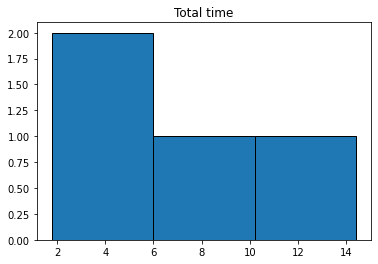

In [22]:
tt.stats.display_histogram(
    th_algorithm_ex1,
    node=n,
    column="Total time",
    bins=3,
    grid=False,
    edgecolor="black"
)

#### Display heatmap

The `display_heatmap()` function allows users to select column(s) from the performance data table, for which a heatmap is generated based on the values of the column.

Some available keyword arguments are the following: 
* `vmax`: maximum value to anchor the color map.
* `vmin`: minimum value to anchor the color map.
* `linecolor`: color of the lines that will divide each cell.
* `linewidths`: Width of the lines that will divide each cell.

An exhaustive list of available arguments can be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html).  

In [23]:
help(tt.stats.display_heatmap)

Help on function display_heatmap in module thicket.stats.display_heatmap:

display_heatmap(thicket, columns=None, **kwargs)
    Display a heatmap which contains a full list of nodes and user passed columns.
    Columns must be from the aggregated statistics table.
    
    Arguments:
        thicket (thicket): Thicket object
        columns (list): List of hardware/timing metrics from aggregated statistics table
            to display. Note: if using a column thicket, the argument must be a tuple.
    
    Returns:
        (matplotlib Axes): Object for managing heatmap plot.



<Axes: ylabel='node'>

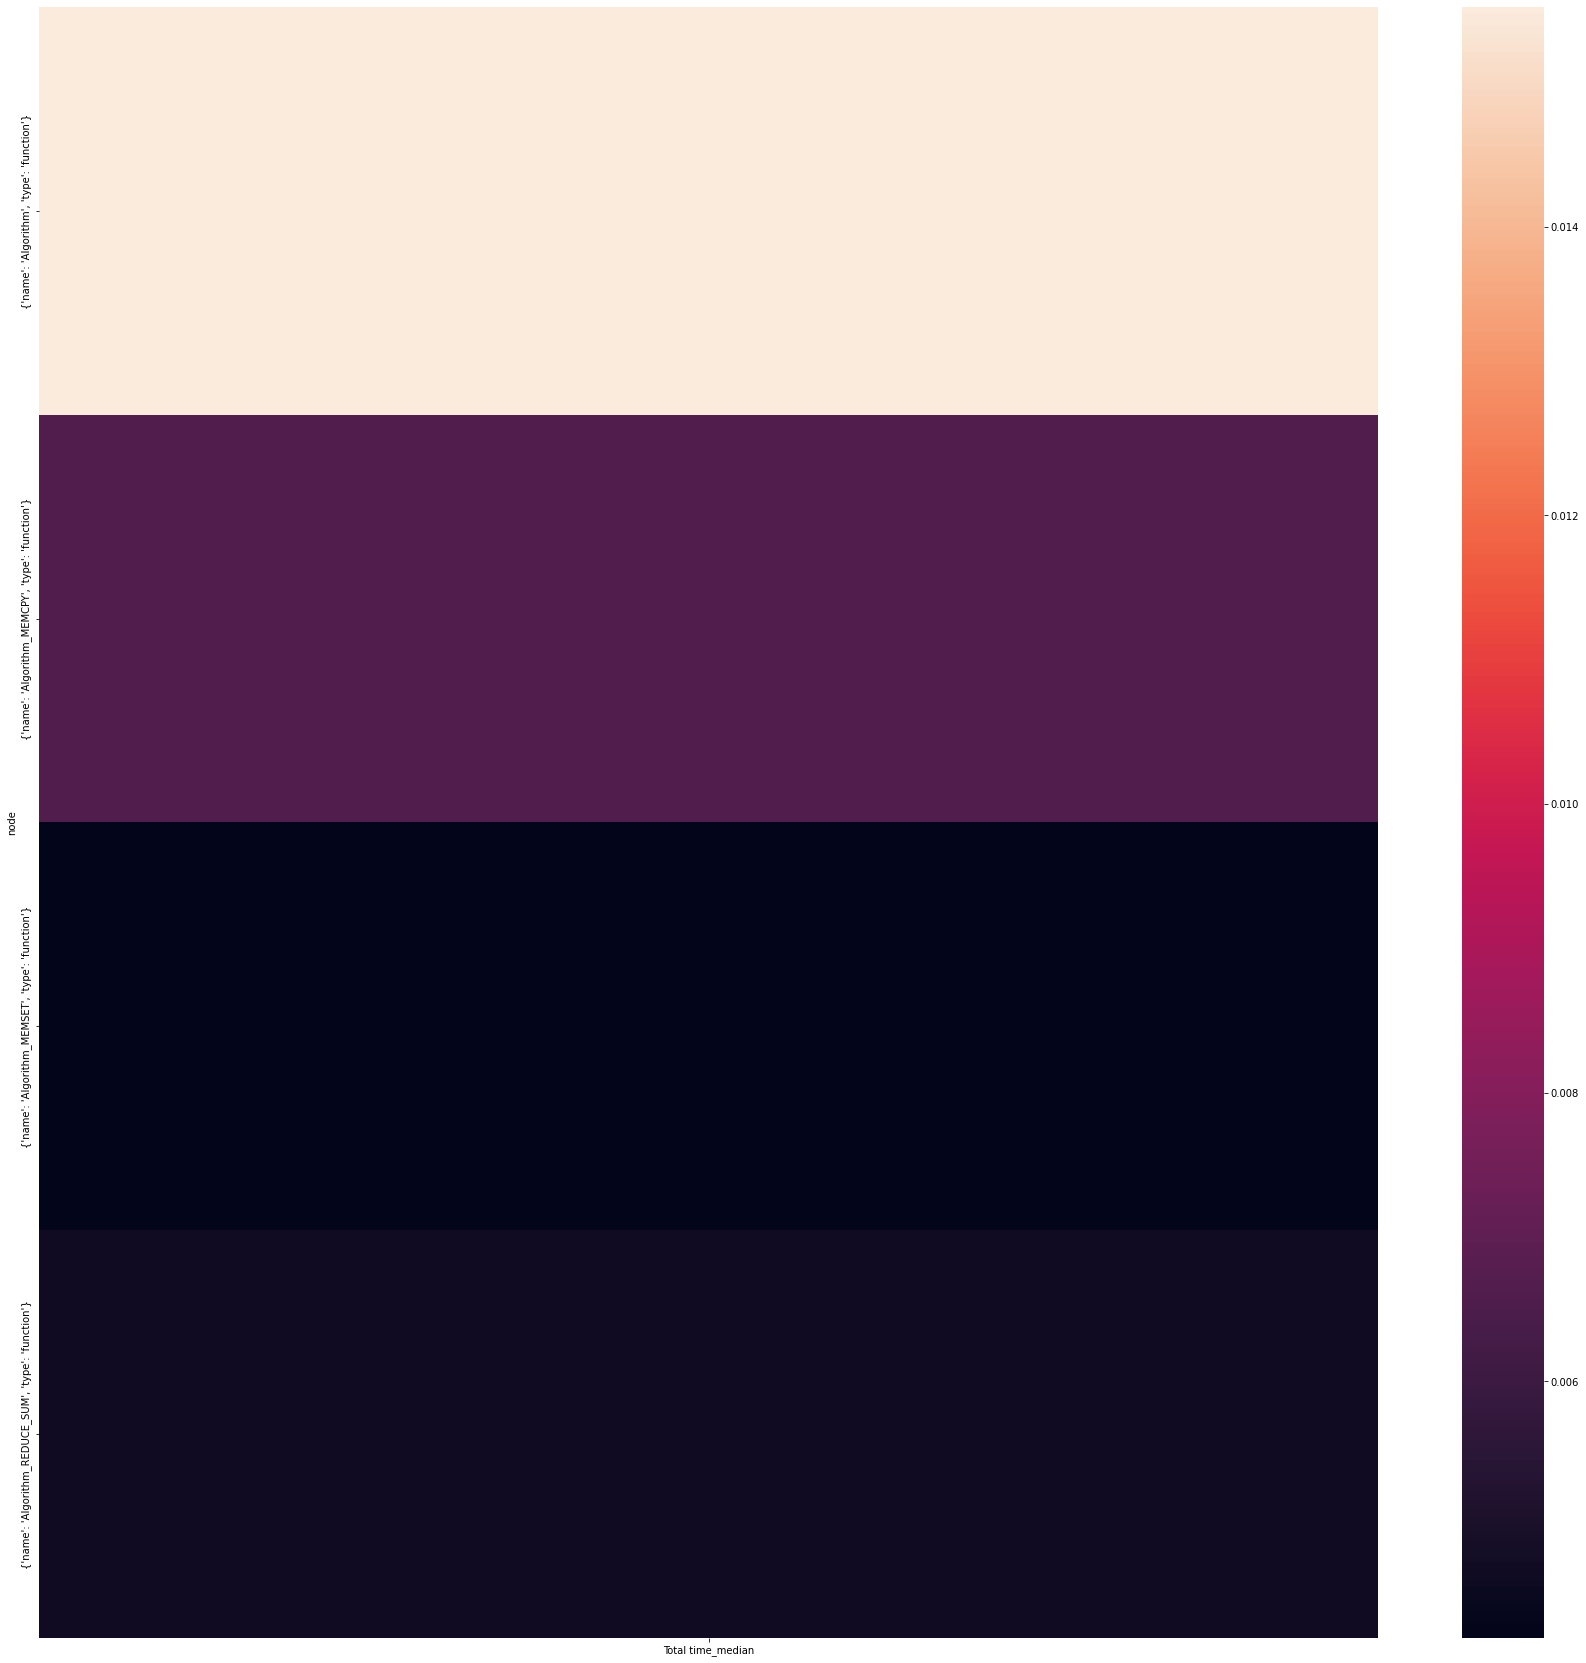

In [24]:
plt.figure(figsize=(30, 30))
metrics = ["Total time_median"]
tt.stats.median(th_algorithm_ex2, columns=["Total time"])
tt.stats.display_heatmap(th_algorithm_ex2, columns=metrics)

## 5. Concatenating Multiple Thickets

#### 5.1 Composing Thickets

We can concatenate Thickets in different ways using the `Thicket.concat_thickets()` function.

In [25]:
data = {
    "block_128": [f"../data/lassen/clang10.0.1_nvcc10.2.89_{x}/1/Base_CUDA-block_128.cali" for x in problem_sizes],
    "block_256": [f"../data/lassen/clang10.0.1_nvcc10.2.89_{x}/1/Base_CUDA-block_256.cali" for x in problem_sizes],
    "block_512": [f"../data/lassen/clang10.0.1_nvcc10.2.89_{x}/1/Base_CUDA-block_512.cali" for x in problem_sizes],
    "block_1024": [f"../data/lassen/clang10.0.1_nvcc10.2.89_{x}/1/Base_CUDA-block_1024.cali" for x in problem_sizes],
}

In [26]:
block_128 = tt.Thicket.from_caliperreader(data["block_128"], disable_tqdm=True)
block_256 = tt.Thicket.from_caliperreader(data["block_256"], disable_tqdm=True)
block_512 = tt.Thicket.from_caliperreader(data["block_512"], disable_tqdm=True)
block_1024 = tt.Thicket.from_caliperreader(data["block_1024"], disable_tqdm=True)

##### 5.1.1 Concatenate on index

In [27]:
# Note: This is equivalent to tt.Thicket.from_caliperreader(data) where "data" is all of the values in the data dictionary.
tk = tt.Thicket.concat_thickets(
    axis="index",
    thickets=[block_128, block_256, block_512, block_1024],
    disable_tqdm=True,
)

In [28]:
display(HTML(tk.dataframe.to_html()))

##### 5.1.2 Concatenate on columns

In [29]:
ctk = tt.Thicket.concat_thickets(
    axis="columns",
    thickets=[block_128, block_256, block_512, block_1024],
    headers=["Block 128", "Block 256", "Block 512", "Block 1024"],
    metadata_key="ProblemSizeRunParam",
    disable_tqdm=True,
)

In [30]:
display(HTML(ctk.dataframe.to_html()))

##### 5.1.3 Alternative example of column concatenation using groupby

In [31]:
tk = tt.Thicket.from_caliperreader(glob('../data/lassen/**/1/*.cali', recursive=True), disable_tqdm=True)

In [32]:
gb = tk.groupby("tuning")

4  thickets created...
{'block_1024': <thicket.thicket.Thicket object at 0xffff383c0100>, 'block_128': <thicket.thicket.Thicket object at 0xffff3834e6d0>, 'block_256': <thicket.thicket.Thicket object at 0xffff40293dc0>, 'block_512': <thicket.thicket.Thicket object at 0xffff381cfe50>}


In [33]:
ctk = tt.Thicket.concat_thickets(
    axis="columns",
    thickets=list(gb.values()),
    headers=list(gb.keys()),
    metadata_key="ProblemSizeRunParam",
    disable_tqdm=True,
)

In [34]:
display(HTML(ctk.dataframe.to_html()))